In [ ]:
import matplotlib.pylab as plt
import cv2
import numpy as np

In [ ]:
def region_of_interest(img,vertices):
    mask = np.zeros_like(img)
    channel_count=img.shape[2]
    match_mask_color=  255   #(255,) * channel_count
    cv2.fillPoly(mask,vertices,match_mask_color)
    masked_image=cv2.bitwise_and(img,mask)
    return masked_image


In [ ]:
def draw_the_lines(img,lines):
  imge=np.copy(img)
  blank_image=np.zeros((imge.shape[0],imge.shape[1],3),\
                                                   dtype=np.uint8)
  for line in lines:
    for x1,y1,x2,y2 in line:
      cv2.line(blank_image,(x1,y1),(x2,y2),(0,255,0),thickness=3)
      imge = cv2.addWeighted(imge,0.8,blank_image,1,0.0)
  return imge

In [ ]:
image=cv2.imread('/content/Road line.webp')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
height=image.shape[0]
width=image.shape[1]
region_of_interest_coor=[(0,height),(0,400),(width/2,height/3),(width,height)]

In [ ]:
gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
canny_image = cv2.Canny(gray_image,100,200)

In [ ]:
cropped=region_of_interest(canny_image,
np.array([region_of_interest_coor],np.int32))

In [ ]:
lines = cv2.HoughLinesP(cropped,rho=2,theta=np.pi/120,threshold=120
,lines=np.array([]),minLineLength=20,maxLineGap=35)

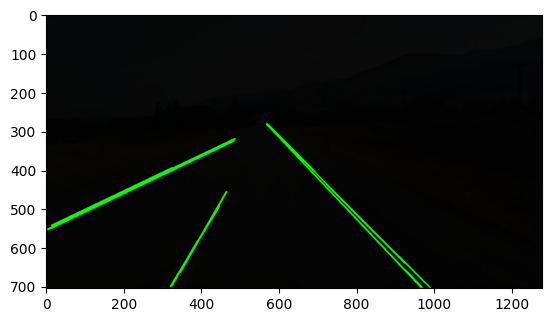

In [ ]:
image_with_lines = draw_the_lines(image,lines)
plt.imshow(image_with_lines)
plt.show()

In [ ]:
import cv2
import numpy as np

In [ ]:
video=cv2.VideoCapture("/content/road_car_view.mp4")

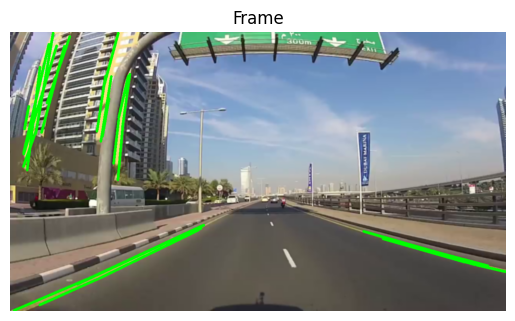

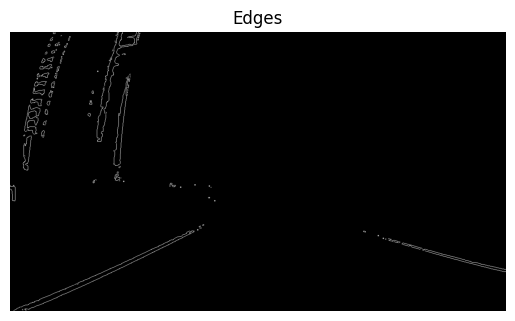

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_frame(frame, title="Frame"):
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Open the video file
video = cv2.VideoCapture("/content/road_car_view.mp4")

while True:
    ret, or_frame = video.read()
    if not ret:
        video = cv2.VideoCapture("/content/road_car_view.mp4")
        continue

    if or_frame is None:
        print("Error: Frame is None")
        break

    # Apply Gaussian blur
    frame = cv2.GaussianBlur(or_frame, (5, 5), 0)

    # Convert frame to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define range of yellow color in HSV
    lower_y = np.array([18, 94, 140])
    upper_y = np.array([48, 255, 255])

    # Threshold the HSV image to get only yellow colors
    mask = cv2.inRange(hsv, lower_y, upper_y)

    # Apply Canny edge detection
    edges = cv2.Canny(mask, 74, 150)

    # Apply Hough Line Transform to detect lines
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, maxLineGap=50)

    # Draw the lines on the original frame
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 5)

    # Display the resulting frame and edges
    display_frame(frame, "Frame")
    display_frame(edges, "Edges")

    # Break the loop after displaying one frame
    break

# Release the video capture object
video.release()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

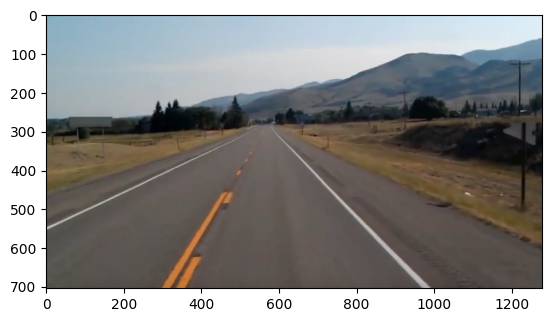

In [ ]:
img = cv2.imread('/content/Road line.webp', cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

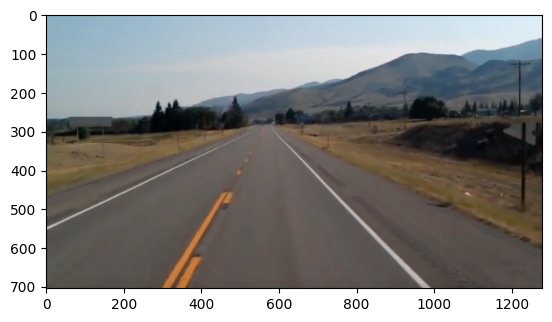

In [ ]:
img2 = cv2.medianBlur(img, 3)
plt.imshow(img2)

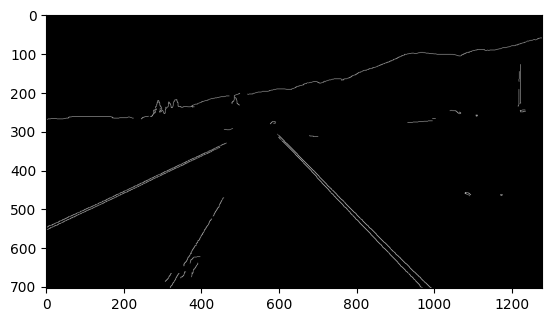

In [ ]:
edges = cv2.Canny(img2, 150, 250)
plt.imshow(edges, cmap='gray')

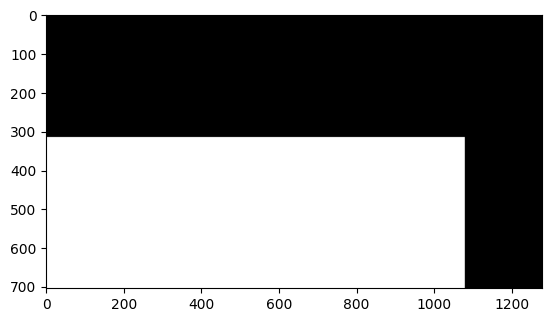

In [ ]:
width, length, _ = img.shape
mask = np.zeros(img.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0, int(3.6*width/8)), (length-200, width), 255, -1)
plt.imshow(mask, cmap='gray')

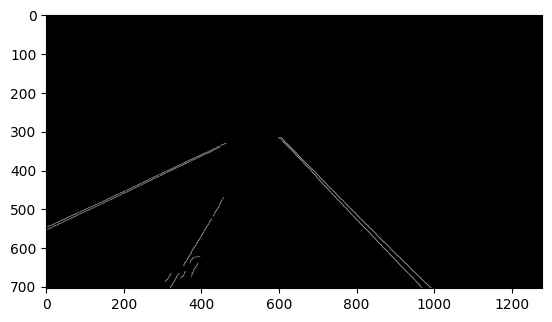

In [ ]:
edges_masked = cv2.bitwise_and(edges, edges, mask=mask)
plt.imshow(edges_masked, cmap='gray')

In [ ]:
def hough_transform_line(img, edge_image, num_rhos=180, num_thetas=180, t_count=300):
    img_copy = img.copy()
    edge_height, edge_width = edge_image.shape[:2]
    edge_height_half, edge_width_half = edge_height / 2, edge_width / 2

    d = np.sqrt(np.square(edge_height) + np.square(edge_width))
    dtheta = 180 / num_thetas
    drho = (2 * d) / num_rhos

    thetas = np.arange(0, 180, step=dtheta)
    rhos = np.arange(-d, d, step=drho)

    cos_thetas = np.cos(np.deg2rad(thetas))
    sin_thetas = np.sin(np.deg2rad(thetas))

    accumulator = np.zeros((len(rhos), len(thetas)))

    for y in range(edge_height):
        for x in range(edge_width):
            if edge_image[y][x] != 0:
                edge_point = [y - edge_height_half, x - edge_width_half]
                for theta_idx in range(len(thetas)):
                    rho = (edge_point[1] * cos_thetas[theta_idx]) + (edge_point[0] * sin_thetas[theta_idx])
                    rho_idx = np.argmin(np.abs(rhos - rho))
                    accumulator[rho_idx][theta_idx] += 1
    best_thetas = np.zeros((20))
    best_counts = np.zeros((20))
    count = 0
    for x in range(accumulator.shape[0]):
        for y in range(accumulator.shape[1]):
            if accumulator[x][y] > t_count :
                rho = rhos[x]
                theta = thetas[y]
                closeness_theta = np.isclose(theta, best_thetas, atol = 20.0)
                z = 0
                e = 0
                for i in range(closeness_theta.size):
                    if closeness_theta[i] == True:
                        e = i
                        z = 1
                        break
                if z == 1:
                    if accumulator[x][y] > best_counts[e]:
                        best_counts[e] = accumulator[x][y]
                else:
                    best_thetas[count] = theta
                    best_counts[count] = accumulator[x][y]
                    count+=1

    for x in range(accumulator.shape[0]):
        for y in range(accumulator.shape[1]):
            if accumulator[x][y] > t_count :
                rho = rhos[x]
                theta = thetas[y]
                if accumulator[x][y] not in list(best_counts) or  accumulator[x][y]==0:
                    continue
                a = np.cos(np.deg2rad(theta))
                b = np.sin(np.deg2rad(theta))
                x0 = (a * rho) + edge_width_half
                y0 = (b * rho) + edge_height_half
                x1 = int(x0 + 1000 * (-b))
                y1 = int(y0 + 1000 * (a))
                x2 = int(x0 - 1000 * (-b))
                y2 = int(y0 - 1000 * (a))

                cv2.line(img_copy, (x1,y1), (x2,y2), (0,255,0), 2)

    return img_copy, accumulator

In [ ]:
img_copy, accumulator = hough_transform_line(img2, edges_masked)

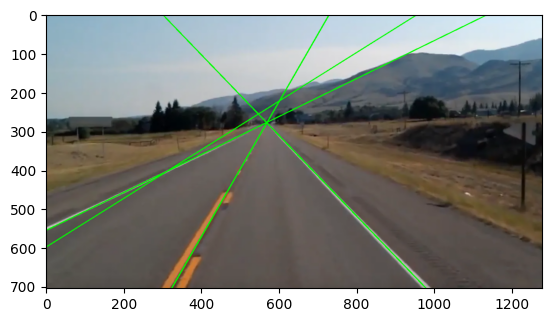

In [ ]:
plt.imshow(img_copy)

In [ ]:
import itertools
from scipy.spatial.distance import pdist

In [ ]:
N = 10

# Convert it into a 1D array
a_1d = accumulator.flatten()

# Find the indices in the 1D array
idx_1d = a_1d.argsort()[-N:]

# convert the idx_1d back into indices arrays for each dimension
x_idx, y_idx = np.unravel_index(idx_1d, accumulator.shape)

# Check that we got the largest values.
points = []
for x, y, in zip(x_idx, y_idx):
    #print(x, y, accumulator[x][y])
    points.insert(0,[x, y])

points = np.array(points)

In [ ]:
Npoints = 3
# making up some data:
# finding row indices of all combinations:
c = [list(x) for x in itertools.combinations(range(len(points)), Npoints)]

distances = []
for i in c:
    distances.append(np.mean(pdist(points[i,:])))
ind = distances.index(max(distances))
rows = c[ind]

In [ ]:
points[rows]

array([[ 85,  66],
       [ 90, 138],
       [ 83,  62]])

In [ ]:
for x in range(accumulator.shape[0]):
    for y in range(accumulator.shape[1]):
        if [x,y] not in points[rows]:
            accumulator[x][y] = 0

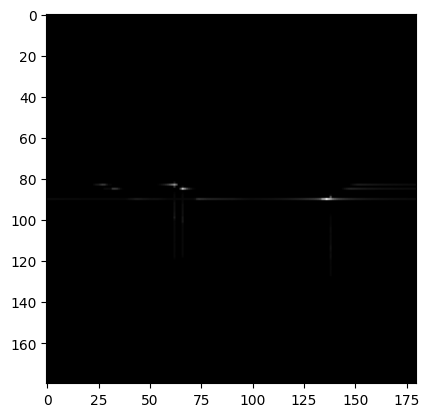

In [ ]:
plt.imshow(accumulator, cmap='gray')

In [ ]:
def hough_apply_line(img, edge_image, accumulator, num_rhos=180, num_thetas=180, t_count=500):

    edge_height, edge_width = edge_image.shape[:2]
    edge_height_half, edge_width_half = edge_height / 2, edge_width / 2

    d = np.sqrt(np.square(edge_height) + np.square(edge_width))
    dtheta = 180 / num_thetas
    drho = (2 * d) / num_rhos

    thetas = np.arange(0, 180, step=dtheta)
    rhos = np.arange(-d, d, step=drho)

    for x in range(accumulator.shape[0]):
        for y in range(accumulator.shape[1]):
            if accumulator[x][y] > t_count:
                rho = rhos[x]
                theta = thetas[y]
                a = np.cos(np.deg2rad(theta))
                b = np.sin(np.deg2rad(theta))
                x0 = (a * rho) + edge_width_half
                y0 = (b * rho) + edge_height_half
                x1 = int(x0 + 1000 * (-b))
                y1 = int(y0 + 1000 * (a))
                x2 = int(x0 - 1000 * (-b))
                y2 = int(y0 - 1000 * (a))
                cv2.line(img, (x1,y1), (x2,y2), (0,255,0), 2)
    return img

In [ ]:
img_copy2 = img2.copy()
img3 = hough_apply_line(img_copy2, edges_masked, accumulator)

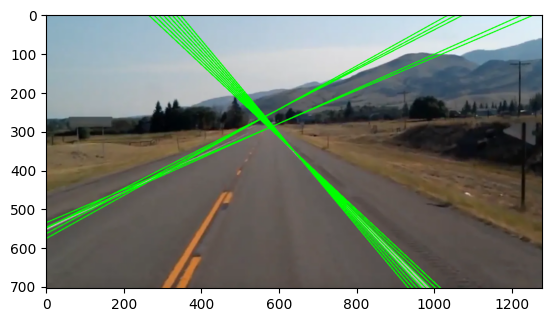

In [ ]:
plt.imshow(img3)

In [ ]:
pip install opencv-python

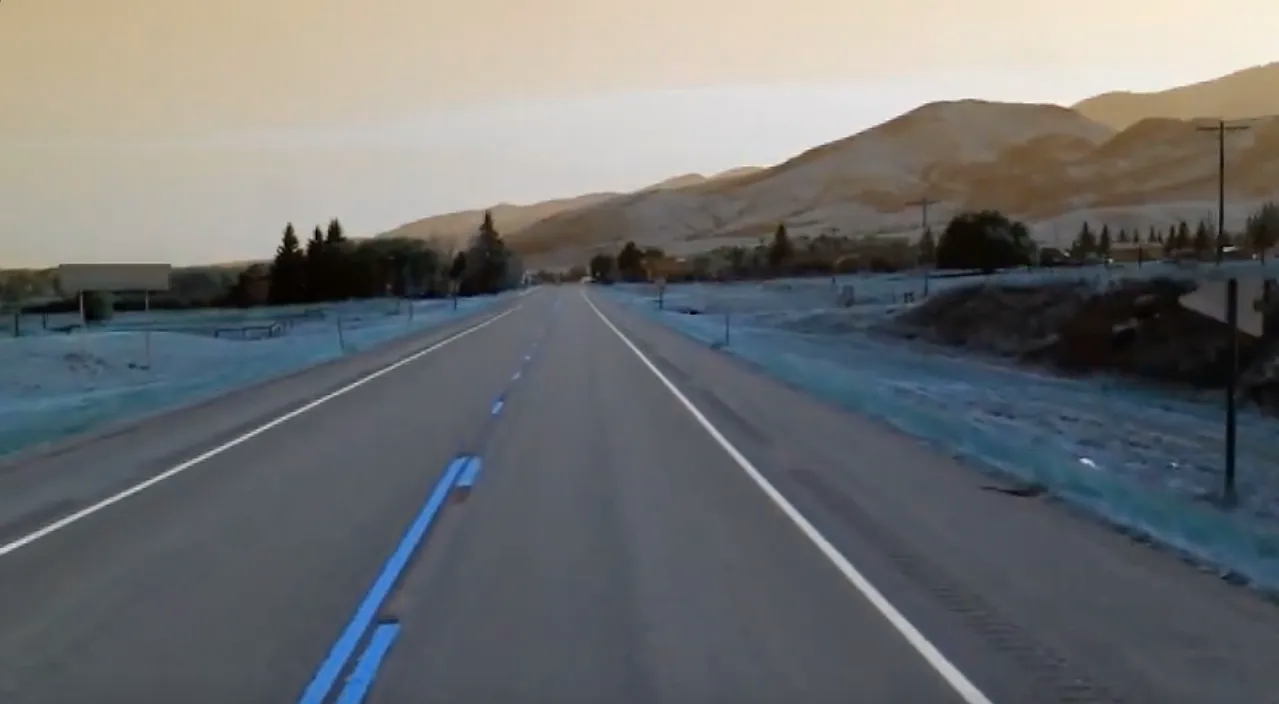

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

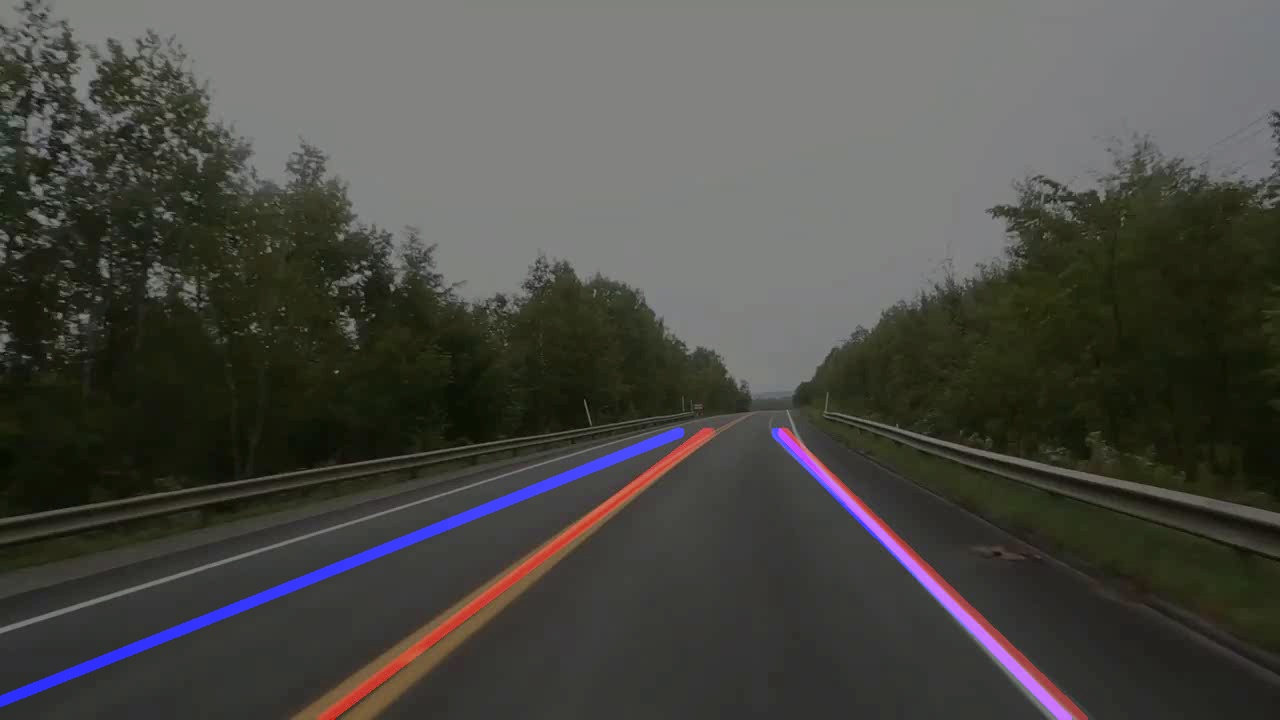

In [ ]:


import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import PIL.Image
def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1 * (3/5))
    x1 = int((y1 - intercept) / slope)
    x2 = int((y2 - intercept) / slope)
    return np.array([x1, y1, x2, y2])
def average_slope_intercept(image, lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    left_fit_average = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    left_line = make_coordinates(image, left_fit_average)
    right_line = make_coordinates(image, right_fit_average)
    return np.array([left_line, right_line])
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0
    canny = cv2.Canny(blur, 50, 150)
    return canny
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image
def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([
        [(200, height), (1100, height), (550, 250)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image
cap = cv2.VideoCapture("/content/test1.mp4")
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    canny_image = canny(frame)
    cropped_image = region_of_interest(canny_image)
    lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=10, maxLineGap=5)
    averaged_lines = average_slope_intercept(frame, lines)
    line_image = display_lines(frame, averaged_lines)
    combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
    cv2.imwrite('/content/output_frame.jpg', combo_image)
    clear_output(wait=True)
    display(PIL.Image.open('/content/output_frame.jpg'))
cap.release()
cv2.destroyAllWindows()
